In [1]:
import requests
from bs4 import BeautifulSoup as bs
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
url = 'https://kathmandupost.com/covid19'

In [3]:
html = requests.get(url)
soup = bs(html.text)
table = soup.find_all('table', class_= 'district-wrapper compact hover dataTable row-border')[0]
header = []
for i in table.tr:
    header.append(i.get_text())

data = defaultdict(list)
html_table_body_data = table.tbody


for tr in html_table_body_data:
    temp = tr.find_all('td')
    data[header[0]].append(temp[0].get_text())
    data[header[1]].append(temp[1].get_text())
    data[header[2]].append(temp[2].get_text())
    data[header[3]].append(temp[3].get_text())  

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(data)
df.head()

,District,Confirmed,Deaths,Recovered
0,Kapilvastu,623,0,26
1,Rautahat,622,0,107
2,Dailekh,479,1,1
3,Sarlahi,476,0,16
4,Banke,297,1,156


In [6]:
df.shape

(77, 4)

In [7]:
df.describe()

,District,Confirmed,Deaths,Recovered
count,77,77,77,77
unique,77,46,3,20
top,Myagdi,6,0,0
freq,1,6,62,23


In [8]:
df.dtypes

District     object
Confirmed    object
Deaths       object
Recovered    object
dtype: object

In [9]:
df['Confirmed'] = df['Confirmed'].astype('float')
df['Deaths'] = df['Deaths'].astype('float')
df['Recovered'] = df['Recovered'].astype('float')

In [10]:
df.dtypes

District      object
Confirmed    float64
Deaths       float64
Recovered    float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   District   77 non-null     object 
 1   Confirmed  77 non-null     float64
 2   Deaths     77 non-null     float64
 3   Recovered  77 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.5+ KB


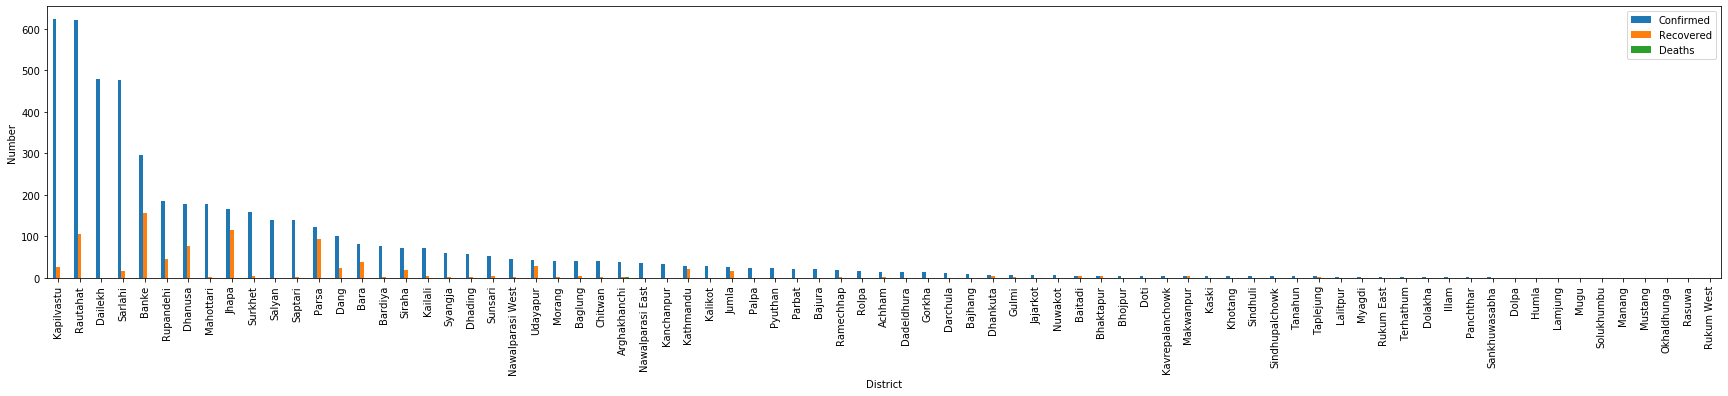

In [12]:
df.plot(kind='bar', x='District', y=['Confirmed', 'Recovered', 'Deaths'], figsize=(30,5))
fig = plt.gca()
fig.set_ylabel('Number')
_ =fig.set_xticklabels(labels = df.District, rotation='90')

In [13]:
test = df[['District', 'Recovered']].head()
test

,District,Recovered
0,Kapilvastu,26.0
1,Rautahat,107.0
2,Dailekh,1.0
3,Sarlahi,16.0
4,Banke,156.0


In [14]:
df.iat[0,0] = 'Kapilbastu'

In [15]:
import folium

In [16]:
folium.__version__

'0.11.0'

In [17]:
nepalMap = folium.Map(location=(28.394857, 84.124008 ), zoom_start=7)

c = folium.Choropleth('shape_files_of_districts_in_nepal.geojson'
                    , data=df
                    , columns=['District', 'Confirmed']
                    , key_on='properties.dist_name'
                    , fill_color='YlOrRd', highlight=True, legend_name='Total Confirmed Cases'

                   ).add_to(nepalMap)

c.geojson.add_child(folium.features.GeoJsonTooltip(['dist_name']))


nepalMap

In [18]:
df[df.District.str.contains('par')]

,District,Confirmed,Deaths,Recovered
21,Nawalparasi West,47.0,0.0,2.0
27,Nawalparasi East,37.0,0.0,1.0


In [19]:
nepalMap = folium.Map(location=(28.394857, 84.124008 ), zoom_start=7)

c = folium.Choropleth('shape_files_of_districts_in_nepal.geojson'
                    , data=df
                    , columns=['District', 'Confirmed']
                    , key_on='properties.dist_name'
                    , fill_color='YlOrRd', highlight=True, legend_name='Total Confirmed Cases'

                   ).add_to(nepalMap)

c.geojson.add_child(folium.features.GeoJsonTooltip(['dist_name']))


nepalMap